In [2]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from copy import deepcopy


In [3]:
df = pd.read_csv('./recommendations_with_score.csv')
users = pd.read_csv('./sample_user_data.csv')

In [4]:
filtered_user_ids = users['user_id'].tolist()

df = df[df['user_id'].isin(filtered_user_ids)]
df

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id,helpful_score,hours_log,score,date_factor,recommendation_credibility,recommendation_credibility_normalized,recommendation_credibility_normalized_log
0,1419170,0,0,2021-08-13,1,0.4,3305939,253,1.0,0.336472,2,0.333333,0.003589,0.00650,0.006479
1,239030,2,0,2019-01-08,1,34.4,5755947,268,2.0,3.566712,4,0.200000,0.045654,0.08267,0.079430
2,311210,0,0,2021-08-03,1,104.3,2323347,510,1.0,4.656813,2,0.333333,0.049673,0.08995,0.086132
3,570,4,0,2013-12-16,1,893.0,4572014,868,3.0,6.795706,10,0.090909,0.059308,0.10740,0.102015
4,1284210,0,0,2022-09-04,1,0.4,7273338,1172,1.0,0.336472,1,0.500000,0.005384,0.00975,0.009703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531424,253430,0,0,2015-07-12,-1,1.0,2444255,41154626,1.0,0.693147,8,0.111111,0.002465,0.00446,0.004450
531425,391220,0,0,2020-09-12,1,72.0,9205268,41154664,1.0,4.290459,3,0.250000,0.034324,0.06216,0.060305
531426,391220,0,0,2020-08-21,1,64.0,1753363,41154679,1.0,4.174387,3,0.250000,0.033395,0.06048,0.058722
531427,262060,0,0,2019-11-04,1,75.0,5035865,41154691,1.0,4.330733,4,0.200000,0.027717,0.05019,0.048971


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.1

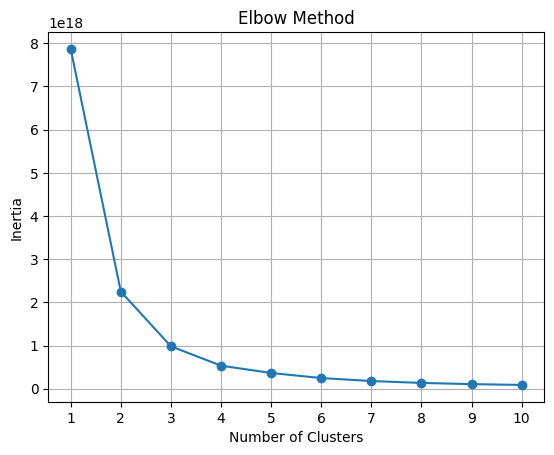

In [5]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

kmeans_df = deepcopy(df)
kmeans_df = kmeans_df.dropna()
kmeans_df = kmeans_df.drop("date", axis=1)

cluster_variables = ["user_id", "recommendation_credibility_normalized_log", "is_recommended"]

# Define a range of clusters to try
max_clusters = 10  # Maximum number of clusters to try
inertia = []

# Fit KMeans with different numbers of clusters and record inertia
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(kmeans_df[cluster_variables])
    inertia.append(kmeans.inertia_)

# Plot the elbow method chart
plt.plot(range(1, max_clusters + 1), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.xticks(range(1, max_clusters + 1))
plt.grid(True)
plt.show()

In [14]:
from sklearn.cluster import KMeans
import pandas as pd

# Step 1: Preprocess your data

# Assuming 'df' is your DataFrame with users' reviews on games


# Your preprocessing steps here (e.g., pivot the DataFrame)

# Step 2: Perform clustering

# Define the number of clusters
num_clusters = 4

# Initialize KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the KMeans model to your data
kmeans.fit(kmeans_df[cluster_variables])

# Step 3: Assign users to clusters

# Get the cluster labels for each user
cluster_labels = kmeans.labels_

# Step 4: Get a list of games for each cluster

# Create a DataFrame to store cluster assignments
cluster_assignments = pd.DataFrame({'user_id': kmeans_df.user_id, 'cluster_label': cluster_labels})

# Merge cluster assignments with the original DataFrame to get the games each user has played
# df_with_clusters = pd.merge(kmeans_df, cluster_assignments, left_index=True, right_on='user_id')

# Group cluster_assignments by user_id and aggregate cluster labels into an array
cluster_mapping = cluster_assignments.groupby('user_id')['cluster_label'].agg(list).reset_index()

# Merge cluster_mapping with kmeans_df
merged_df = pd.merge(kmeans_df, cluster_mapping, on='user_id', how='left')
merged_df['cluster_label'] = merged_df['cluster_label'].apply(lambda x: list(set(x)))
merged_df

# # Group the DataFrame by cluster label and aggregate the games played by users in each cluster
# cluster_games = df_with_clusters.groupby('Cluster_Label').sum()

# # Display the list of games for each cluster
# print(cluster_games)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,app_id,helpful,funny,is_recommended,hours,user_id,review_id,helpful_score,hours_log,score,date_factor,recommendation_credibility,recommendation_credibility_normalized,recommendation_credibility_normalized_log,cluster_label
0,1419170,0,0,1,0.4,3305939,253,1.0,0.336472,2,0.333333,0.003589,0.00650,0.006479,[2]
1,239030,2,0,1,34.4,5755947,268,2.0,3.566712,4,0.200000,0.045654,0.08267,0.079430,[0]
2,311210,0,0,1,104.3,2323347,510,1.0,4.656813,2,0.333333,0.049673,0.08995,0.086132,[2]
3,570,4,0,1,893.0,4572014,868,3.0,6.795706,10,0.090909,0.059308,0.10740,0.102015,[0]
4,1284210,0,0,1,0.4,7273338,1172,1.0,0.336472,1,0.500000,0.005384,0.00975,0.009703,[3]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531424,253430,0,0,-1,1.0,2444255,41154626,1.0,0.693147,8,0.111111,0.002465,0.00446,0.004450,[2]
531425,391220,0,0,1,72.0,9205268,41154664,1.0,4.290459,3,0.250000,0.034324,0.06216,0.060305,[3]
531426,391220,0,0,1,64.0,1753363,41154679,1.0,4.174387,3,0.250000,0.033395,0.06048,0.058722,[2]
531427,262060,0,0,1,75.0,5035865,41154691,1.0,4.330733,4,0.200000,0.027717,0.05019,0.048971,[0]


In [15]:
cluster_assignments.sort_values(by="user_id")

,user_id,cluster_label
457798,947,2
20858,947,2
174474,947,2
79193,947,2
470439,947,2
...,...,...
407801,14305218,1
435235,14305218,1
231193,14305218,1
392669,14305218,1


In [16]:
merged_df.to_csv('clustering.csv', index=False)


In [17]:
merged_df.sort_values(by="user_id")


,app_id,helpful,funny,is_recommended,hours,user_id,review_id,helpful_score,hours_log,score,date_factor,recommendation_credibility,recommendation_credibility_normalized,recommendation_credibility_normalized_log,cluster_label
457798,1066900,0,0,1,1.1,947,36579228,1.0,0.741937,2,0.333333,0.007914,0.01433,0.014228,[2]
20858,292030,0,0,1,79.2,947,2543284,1.0,4.384524,2,0.333333,0.046768,0.08469,0.081294,[2]
174474,964800,12,4,-1,11.2,947,16821258,5.0,2.501436,1,0.500000,0.200115,0.36239,0.309241,[2]
79193,1036890,0,2,1,6.2,947,8967417,1.0,1.974081,1,0.500000,0.031585,0.05720,0.055624,[2]
470439,312990,5,0,1,1.0,947,37243937,4.0,0.693147,6,0.142857,0.012675,0.02295,0.022691,[2]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407801,447820,6,0,1,42.3,14305218,32928250,4.0,3.768153,6,0.142857,0.068903,0.12478,0.117587,[1]
435235,262410,0,0,1,1.0,14305218,35033316,1.0,0.693147,5,0.166667,0.003697,0.00669,0.006668,[1]
231193,274170,0,0,1,36.2,14305218,20661077,1.0,3.616309,7,0.125000,0.014465,0.02620,0.025863,[1]
392669,914620,0,0,1,4.0,14305218,32076867,1.0,1.609438,5,0.166667,0.008584,0.01554,0.015420,[1]
